<a href="https://colab.research.google.com/github/gagyeomkim/deep-learning-from-scratch1/blob/gagyeomkim/ch3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 퍼셉트론에서 신경망으로
가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력은 신경망의 중요한 성질

## 신경망의 예

|입력층|은닉층|출력층|
|:---:|:---:|:---:|
|가장 왼쪽줄|중간줄|맨 오른쪽 줄|



## 퍼셉트론 복습

## 활성화 함수의 등장

- **활성화 함수(activation function)** : **입력신호의 총합**을 **출력신호**로 변환하는 함수
- **뉴런**과 **노드**란 용어는 같은 의미
- 단순 퍼셉트론 : 단층 네트워크에서 **계단함수**를 활성화 함수로 사용한 모델
    - 계단 함수 : 임계값을 경계로 출력이 바뀌는 함수
- 다층 퍼셉트론 : 신경망
    - 신경망 : **여러 층**으로 구성되고 시그모이드 함수등의 **매끈한 활성화 함수**를 사용하는 네트워크

# 3.2 활성화함수
- 계단함수 : 임계값을 경계로 출력이 바뀌는 함수
- 퍼셉트론과 신경망의 주된 차이는 **활성화함수**뿐

In [52]:
# 계단 함수
# 이 구현은 단순하고 쉽지만, 인수는 실수(부동소수점)만 받아들임
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [53]:
# 넘파이를 이용한 계단함수
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [54]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [55]:
y = x > 0
y

array([False,  True,  True])

넘파이 배열의 자료형을 변환할 때는 `astype()` 메서드를 이용한다.
- 인자 : 원하는 자료형
-파이썬에서는 bool을 int로 변환하면 아래와 같이 변환됨.
    - `True` -> 1
    - `False` -> 0

In [56]:
y = y.astype(np.int64)
y

array([0, 1, 1])

## 계단 함수의 그래프

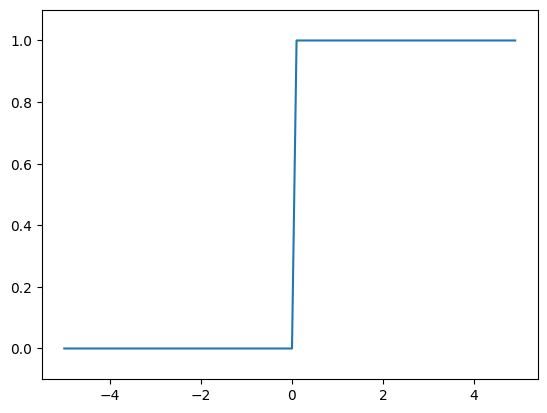

In [57]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
plt.show()

## 시그모이드 함수 구현하기

In [58]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

브로드캐스트 : 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행하는 것

In [59]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)  #인수가 넘파이 배열이어도 올바른 결과가 나온다. <- 브로드캐스트 덕분

array([0.26894142, 0.73105858, 0.88079708])

In [60]:
# 브로드캐스트 복습
t = np.array([1.0, 2.0, 3.0])
print(1.0+t)
print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


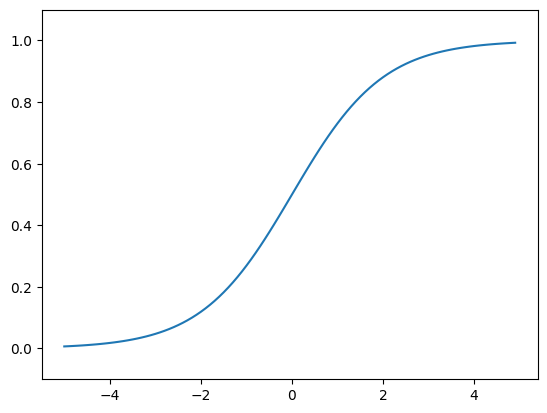

In [61]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1 , 1.1)    # y축 범위 지정
plt.show()

- 시그모이드 = s자모양

## 시그모이드 함수와 계단함수 비교
1. 매끄러움의 차이 존재
2. 둘 다 입력이 작을때의 출력은 0에 가깝고(혹은 0이고), 입력이 커지면 1에 가까워지는(혹은 1이 되는) 구조
3. 입력이 아무리 작거나 커도 출력은 0에서 1사이

## 비선형 함수
계단 함수와 시그모이드 함수의 공통점은 둘 모두 **비선형 함수**라는 것
* 함수 : 어떤 값을 입력하면 그에 따른 값을 돌려주는 '변환기'
* 선형 함수 : 무언가를 입력했을 때 출력이 입력의 상수배만큼 변하는 함수
* 비선형 함수 : 문자 그대로 선형이 아닌 함수

신경망에서는 활성화 함수로 **비선형 함수**를 사용해야함
- 선형함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문
- 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야함


## ReLU 함수
ReLU(Rectified Linear Unit, 렐루) : 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하면 0을 출력하는 함수
> Rectified는 '정류된'이란 뜻임. 정류는 전기회로 쪽 용어로, 예를들어 반파 정류 회로는 +/-가 반복되는 교류에서 -흐름을 차단하는 회로임. 즉, x가 0이하일 때를 차단하여 아무값도 출력하지 않는(0을 출력하는)것. 그래서 ReLU함수를 '정류된 선형함수'라고도 표현가능

In [62]:
# ReLU 함수 구현
def relu(x):
    return np.maximum(0, x) #np.maximum()은 두 입력 중 큰 값을 선택해 반환하는 함수

# 3.3 다차원 배열의 계산

## 다차원 배열

In [63]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [64]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


## 행렬의 곱

In [65]:
A = np.array([[1,2],[3,4]])
print(A.shape)
B = np.array([[5,6],[7,8]])
print(B.shape)
np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [66]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)
np.dot(A,B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [67]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)
C = np.array([[1,2],[3,4]])
print(C.shape)
np.dot(A,C) # 행렬 곱이 불가능

(2, 3)
(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [68]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)
np.dot(A,B)

(3, 2)
(2,)


array([23, 53, 83])

## 신경망에서의 행렬곱

In [69]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)


In [70]:
Y=np.dot(X,W)
print(Y)

[ 5 11 17]


# 3.4 3층 신경망 구현하기

## 표기법 설명
## 각 층의 신호 전달 구현하기

In [71]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) #(2,3)
print(X.shape)  #(2,)
print(B1.shape) #(3,)

A1 = np.dot(X,W1)+B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [72]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5], [0.3,0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) #(3,)
print(W2.shape) #(3,2)
print(B2.shape) #(2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [73]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3)+B3
Y = identity_function(A3)   #혹은 Y = A3
print(Y)

[0.31682708 0.69627909]


## 구현 정리

In [74]:
# 가중치와 편향 초기화
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

#순방향(입력 -> 출력방향)으로 전달됨
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 3.5 출력층 설계하기


In [75]:
 a = np.array([0.3, 2.9, 4.0])
 exp_a = np.exp(a)  #지수함수
 print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [76]:
sum_exp_a = np.sum(exp_a)   #지수함수의 합
sum_exp_a

74.1221542101633

In [77]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [78]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a =np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 소프트맥스 함수 구현시 주의점

In [79]:
# 기본
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))   #소프트맥스 함수의 계산 -> 오버플로 발생

<ipython-input-79-dc9f2e4b3efb>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))   #소프트맥스 함수의 계산 -> 오버플로 발생
<ipython-input-79-dc9f2e4b3efb>:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))   #소프트맥스 함수의 계산 -> 오버플로 발생


array([nan, nan, nan])

In [80]:
# 개선
c = np.max(a)   # c = 1010(최댓값)
a-c

array([  0, -10, -20])

In [81]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [82]:
# 개선한 소프트맥스
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 소프트맥스 함수의 특징
- 소프트맥스 함수의 출력은 0에서 1.0사이의 실수이다
- 소프트맥스 출력의 총합은 1이다

위 성질들로, 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.
- 주의할 점은 소프트맥스함수를 적용해도 각 원소의 대소관계는 변하지 않는다.(a의 원소들 사이의 대소관계가  y의 원소들 사이의 대소관계로 그대로 이어진다. exp(x)가 단조 증가 함수이기 때문)
- 신경망을 이용한 분류(classification)에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하며, 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. <- **추론 과정**에서 신경망 분류시 출력층의 소프트맥스 함수를 생략해도 된다.
- **신경망을 학습 시킬 때**는 출력층에서 소프트맥스 함수를 사용한다.

In [83]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [84]:
np.sum(y)

1.0

## 출력층의 뉴런 수 정하기
- **출력층의 뉴런 수**는 풀려는 문제에 맞게 적절히 정해야한다.(은닉층의 뉴런수는 학습시켜가며 조정해야한다.)
- classification에서는 **분류하고 싶은 클래스 수**로 설정하는 것이 일반적이다.

# 3.6 손글씨 숫자 인식
## MNIST 데이터 셋
- 코랩 환경 세팅 : https://bottle-an00.tistory.com/47
- [MNIST 서버 다운으로 인한 대체 사이트 링크](https://github.com/oreilly-japan/deep-learning-from-scratch/commit/497a4ac8859dce7a3b4819edf695364afe73fcda#diff-76274e4fdfe308fbaefa310b10ec779ffea85648f6ab3aff271c6a45c0ee28d1R14)

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import sys, os
sys.path.append('/content/drive/MyDrive/github/deep-learning-from-scratch1')    #코랩 내 실습으로 인한 코드 변경
from dataset.mnist import load_mnist    # mnist.py의 url_base부분을 대체 사이트로 변경 후 작동

In [87]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

#각 형상 데이터 출력
print(x_train.shape)    #(60000, 784)
print(t_train.shape)    #(60000,)
print(x_test.shape) #(10000,784)
print(t_test.shape) #(10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### `mnist_show.py`
- [구글 코랩에서 `img_show()`가 동작되지 않을 때](https://lapina.tistory.com/81)

5
(784,)
(28, 28)


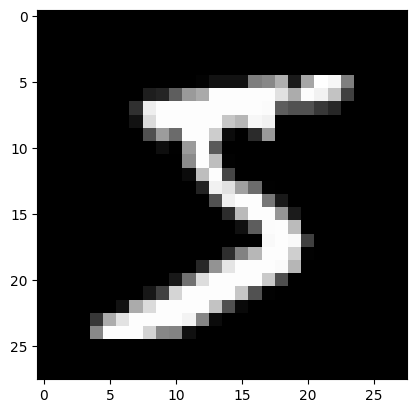

In [88]:
import sys, os
sys.path.append('/content/drive/MyDrive/github/deep-learning-from-scratch1')    #코랩 내 실습으로 인한 코드 변경
import numpy as np
from dataset.mnist import load_mnist
# from PIL import Image
from matplotlib.pyplot import imshow    #img_show 대체 함수

# def img_show(img):
#     pil_img = Image.fromarray(np.uint8(img))
#     pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)
img = x_train[0]
label = t_train[0]
print(label)    # 5

print(img.shape)    #(784,)
img = img.reshape(28, 28)   #원래 이미지의 모양으로 변형
print(img.shape)    #(28,28)

# img_show(img)   #온라인 파이썬 환경에서는 작동 X
imshow(img, cmap = 'gray')  #img_show 대체 함수로 matplotlib 사용

## 신경망의 추론 처리


In [89]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### `neuralnet_mnist.py`

In [90]:
import numpy as np
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("/content/drive/MyDrive/github/deep-learning-from-scratch1/dataset/sample_weight.pkl",'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)

    return y

In [91]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)    # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt +=1
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


## 배치처리

In [92]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [93]:
x.shape

(10000, 784)

In [94]:
x[0].shape

(784,)

In [95]:
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784, 50)
(50, 100)
(100, 10)


In [96]:
# 배치처리 구현
x, t = get_data()
network = init_network()

batch_size = 100    #배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] #batch_size만큼 잘라서 100개만 먼저학습
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy : "+str(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352


In [97]:
# range() 함수
print(list(range(0,10)))
print(list(range(0, 10, 3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


In [98]:
# argmax()의 axis = 1
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis = 1)
y2 = np.argmax(x, axis = 0)
print(y)
print(y2)

[1 2 1 0]
[3 0 1]


In [99]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y == t)

[ True  True False  True]


In [100]:
np.sum(y==t)

3